# Decision Tree Task
Using of Iris Dataset to create a Decision Tree and visualize it graphically, if we feed any new data in the classifier, it would be able to predict the right class accordingly

In [1]:
#importing Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import sklearn.datasets as datasets

!pip install GraphViz

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#importing the csv file of iris dataset
irisData = datasets.load_iris()
iris_df = pd.DataFrame(irisData.data, columns = irisData.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
iris_df.shape #size of the object

(150, 4)

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# DATA VISUALISATION OF THE DATASET

Text(0.5, 0, 'Petal Length (cm)')

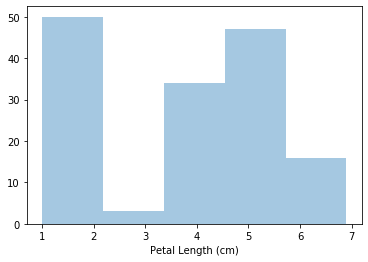

In [5]:
sns.distplot(a = iris_df['petal length (cm)'], kde = False)
plt.xlabel('Petal Length (cm)')

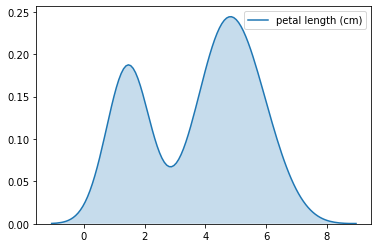

In [6]:
sns.kdeplot(data = iris_df['petal length (cm)'],shade = True)

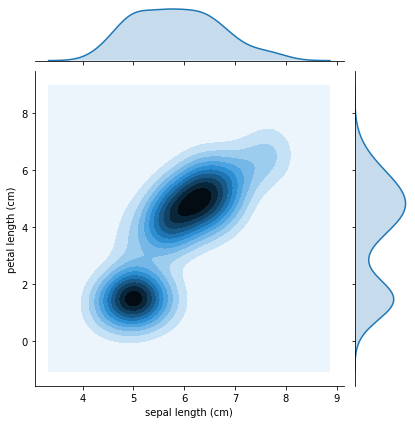

In [7]:
sns.jointplot(x=iris_df['sepal length (cm)'], y = iris_df['petal length (cm)'], kind = 'kde')



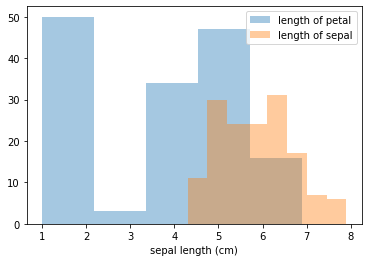

In [8]:
sns.distplot(a = iris_df['petal length (cm)'], label = 'length of petal', kde = False)
sns.distplot(a = iris_df['sepal length (cm)'], label = 'length of sepal', kde = False)
plt.legend()

In [9]:
#dividing the iris dataset and uploading the csv files according to the species
iris_set = pd.read_csv(r'C:\Users\Administrator\Desktop\iris-setosa.csv', index_col = 'Id')
iris_ver = pd.read_csv(r'C:\Users\Administrator\Desktop\iris-2.csv', index_col = 'Id')
iris_vir = pd.read_csv(r'C:\Users\Administrator\Desktop\iris-3.csv', index_col = 'Id')

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

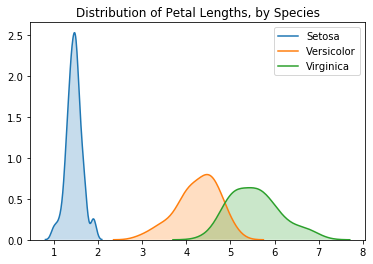

In [10]:
sns.kdeplot(data=iris_set['PetalLengthCm'], label="Setosa", shade=True)
sns.kdeplot(data=iris_ver['PetalLengthCm'], label="Versicolor", shade=True)
sns.kdeplot(data=iris_vir['PetalLengthCm'], label="Virginica", shade=True)
plt.legend()
plt.title("Distribution of Petal Lengths, by Species")

# Decision Tree algorithm

In [11]:
#Independent variables
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
#Dependent Variable
target= irisData.target
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
#importing train test split to train and test the data.
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size = 0.3, random_state = 3)

In [14]:
X_train.shape


(105, 4)

In [15]:
y_train.shape

(105,)

In [16]:
X_test.shape

(45, 4)

In [17]:
y_test.shape

(45,)

The shapes of the trained data and tested data of X and Y are matching.


In [18]:
#Importing decision tree classifier from scikit learn
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
tree #shows default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
clf = tree.fit(iris_df,target)

In [20]:
#Predicting the species from the independent test variable data
pred_tree = tree.predict(X_test)
print(pred_tree[0:10])

[0 0 0 0 0 2 1 0 2 1]


In [21]:
#printing the actual species
print(y_test[0:10])

[0 0 0 0 0 2 1 0 2 1]


In [22]:
#Calculating the accuracy of the model
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

DecisionTrees's Accuracy:  1.0


[Text(167.4, 195.696, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 152.208, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 152.208, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 108.72, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 65.232, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 21.744, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 21.744, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 4.85\nentropy = 0.151\nsamples = 

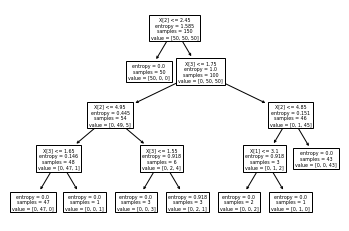

In [23]:
#Visualising  it through plot_tree() function
from sklearn import tree
tree.plot_tree(clf)

In [24]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

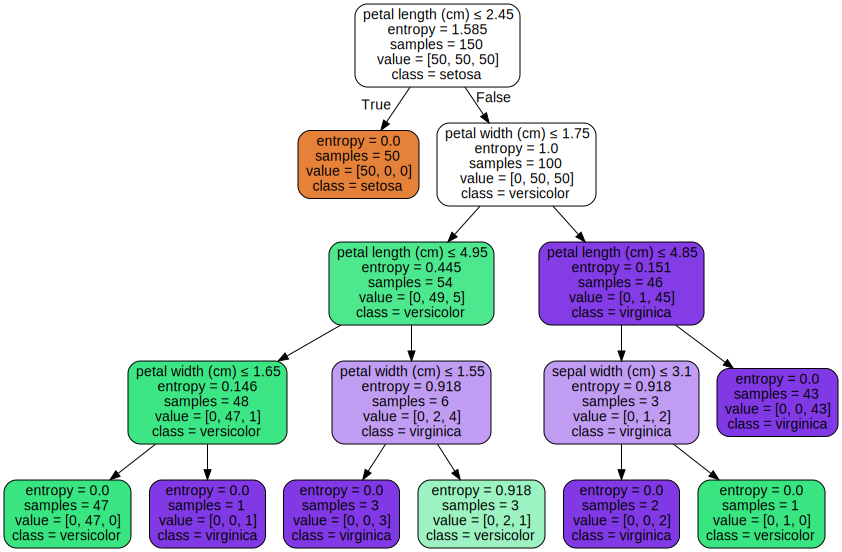

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=irisData.feature_names,  
                      class_names=irisData.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 